## **Import Libraries**

In [26]:
import sys
sys.path.insert(1, '../scripts')
import original_model
import extended_model
import importlib
importlib.reload(extended_model)

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import bisect

import itertools
from functools import reduce
from operator import mul

## **Observe model components one by one**

### Create belief networks

In [12]:
G_complete = extended_model.complete_belief_network(N=3, edge_values="default")
G_ER = extended_model.gnp_belief_network(n_nodes=3, prob=.3, seed=89)

In [13]:
gradient_colors = extended_model.weight_gradient_color_matching(n=3, c1='red', c2='blue')

for _ in [G_complete, G_ER]:
    extended_model.add_colors_to_edges(_, gradient_colors)

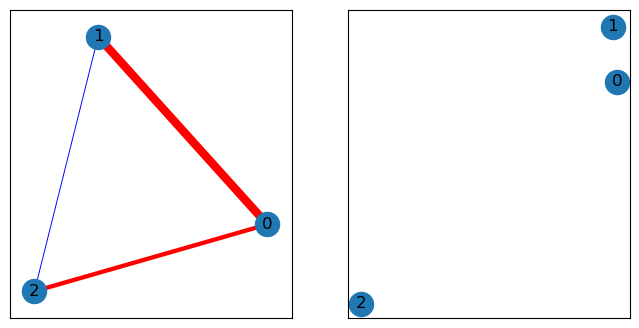

In [14]:
fig, axs = plt.subplots(1,2,figsize=(8,4))

for i, g in zip([0,1], [G_complete, G_ER]):
    nx.draw_networkx(g, 
                    ax=axs[i], 
                    edge_color=[g.edges[e]['color'] for e in g.edges()],
                    width=[abs(g.edges[e]['belief'])*10 for e in g.edges()])


### Internal energy of individual i’s belief network:

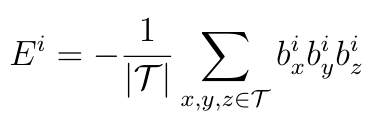

In [15]:
triads = extended_model.find_triads(G_complete)
triads

[[0, 1, 2]]

In [16]:
extended_model.triad_energy(G_complete, triads[0], weight_key="belief")

0.012967497549730755

In [17]:
extended_model.internal_energy(G_complete)

-0.012967497549730755

### Derivative of triad energy
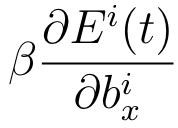

In [27]:
triads = extended_model.find_triads(G_complete)
triad = triads[0]
focal_edge = (0,1)
extended_model.derivative_triad_energy(G_complete, triad=triad, focal_edge=focal_edge)

-0.021497216243797062

### Derivative of internal energy

In [33]:
def derivative_internal_energy(G: nx.Graph, focal_edge) -> float:

    """calculate the derivative of the internal energy of an individual
    with respect to the focal edge, evaluated at the given weight configuration.
    This is reflects how much the internal energy changes upon changing the focal
    edge weight.

    Parameters
    ----------
    G -> networkx graph of the individual belief network

    focal_edge -> focal "receiver edge" tuple eg: (1, 2)

    Returns
    -------
    float
        derivative of internal evaluated at the given weight configuration (edge weights)
    """
    # The triads not including the ones without the focal edge
    triads = extended_model.find_triads(G)
    triads_with_focal_edge = [t for t in triads if (focal_edge[0] in t) & (focal_edge[1] in t)]

    return -1.0 * sum(derivative_triad_energy(G, triad, focal_edge) for triad in triads_with_focal_edge)

In [34]:
focal_edge = (0,1)
derivative_internal_energy(G_complete, focal_edge)

0.021497216243797062

## **Run the simulation**

In [27]:
alpha = 1.5 # weight of social influence
beta = 1 # weight of internal coherence
N = 40 # number of nodes in the population
n = 3 # number of nodes in each individuals' belief system
hub_kind = 'unstable' # initial stability of the hub.

result_single_run = model.star_graph_dynamics(alpha=alpha,
                                                beta=beta,
                                                N=N,
                                                n=n,
                                                hub_kind=hub_kind)

0
Simulation is in time step 0 out of 80
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
0
Simulation is in time step 0 out of 80
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
0
Simulation is in time step 0 out of 80
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
0
Simulation is in time step 0 out of 80
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54

In [35]:
result_single_run[1.5][1][.25]

['unstable',
 'unstableplus',
 'unstableplus',
 'unstableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'unstableplus',
 'unstableplus',
 'unstableplus',
 'unstableplus',
 'unstableplus',
 'unstableplus',
 'unstableplus',
 'unstableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'stableplus',
 'sta